In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sys
import warnings 
import os 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

import librosa
import librosa.display
import IPython.display as ipd



Ravdess = "/home//sentiment-analysis/ravdess/audio_speech_actors_01-24/" # Ryerson Audio-Visual Database of Emotional Speech and Song 
Crema = "/home//sentiment-analysis/crema/AudioWAV/" # Crowd-sourced Emotional Mutimodal Actors Dataset
Tess = "/home//sentiment-analysis/tess/TESS Toronto emotional speech set data/" # Toronto emotional speech set

In [2]:
ravdess_dir_lis = os.listdir(Ravdess)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(Ravdess, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{Ravdess}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()@

,path,sex,emotion
0,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
1,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
2,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
3,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
4,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,happy


In [3]:
crema_dir_list = os.listdir(Crema)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{Crema}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,angry
1,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,disgust
2,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,fear
3,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,happy
4,/home/fekef/sentiment-analysis/crema/AudioWAV/...,male,sad


In [4]:
tess_dir_list = os.listdir(Tess)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(Tess, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{Tess}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
1,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
2,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
3,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear
4,/home/fekef/sentiment-analysis/tess/TESS Toron...,female,fear


In [5]:
df = pd.concat([
    ravdess_df,
    crema_df,
    tess_df
], axis = 0)
df.to_csv("emotions_df.csv", index = False)
df.head()
#2400 voice

,path,sex,emotion
0,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
1,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
2,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
3,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,neutral
4,/home/fekef/sentiment-analysis/ravdess/audio_s...,male,happy


In [6]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
1,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
2,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
3,/home/fekef/sentiment-analysis/ravdess/audio_s...,neutral
4,/home/fekef/sentiment-analysis/ravdess/audio_s...,happy


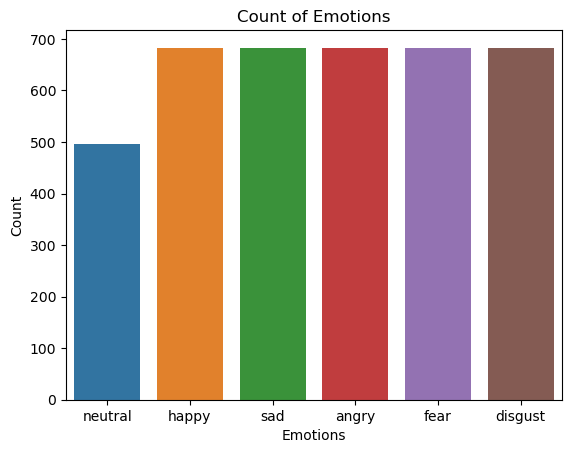

In [7]:
plt.title("Count of Emotions")
sns.countplot(data=df, x="emotion")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

In [8]:
from IPython.display import Audio

def create_wave_plot (df, emo):
    audio, sr = librosa.load(df)
    plt.figure(figsize=(10,3))
    plt.title(f'Waveplot for audio with {emo} emotion', size=16)
    librosa.display.waveshow(audio, sr=sr)
    plt.show()

def show_melspectrogram (df, emo):
    S_db, sr = create_melspectrogram (df)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, y_axis='mel', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for audio with {emo} emotion')
    plt.tight_layout()
    plt.show()

def create_melspectrogram(df):
    audio, sr = librosa.load(df, sr=22050)
    n_frames = int(sr*1.2)
    start_frame = int(len(audio) // 2 - n_frames // 2)
    end_frame = start_frame + n_frames
    audio_cut = audio[start_frame:end_frame]
    S = librosa.feature.melspectrogram(y=audio_cut, sr=sr, n_mels=128, n_fft=1024, hop_length=512)
    S_db =librosa.power_to_db(S, ref=np.min)
    return S_db, sr
                                    
def create_mfcc(audio, sr):
    n_frames = int(sr*1.2)
    start_frame = int(len(audio) // 2 - n_frames // 2)
    end_frame = start_frame + n_frames
    audio_cut = audio[start_frame:end_frame]
    feature = np.mean(librosa.feature.mfcc(y=audio_cut,sr=sr,n_mfcc=40).T,axis=0)
    return feature

def create_origin(df):
    S, sr = librosa.load(df)
    feature = create_mfcc(S,sr)
    return feature

# Data Augmentation

Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
    
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.

The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
    
In order to this to work adding the perturbations must conserve the same label as the original training sample.
    
In images data augmention can be performed by shifting the image, zooming, rotating ...

In [9]:
def create_noise(df):
    S, sr = librosa.load(df)
    noise_amp = 0.035*np.random.uniform()*np.amax(S)
    S = S + noise_amp*np.random.normal(size=S.shape[0])
    feature = create_mfcc(S,sr)
    return feature

def create_pitch(df):
    S, sr = librosa.load(df)
    S = librosa.effects.pitch_shift(y=S, sr=sr, n_steps=0.7)
    feature = create_mfcc(S,sr)
    return feature

def create_stretch(df):
    S, sr = librosa.load(df)
    S = librosa.effects.time_stretch(y=S, rate=0.85)
    feature = create_mfcc(S,sr)
    return feature

In [10]:
origin = df['path'].apply(lambda x:create_origin(x))
noise = df['path'].apply(lambda x:create_noise(x))
pitch = df['path'].apply(lambda x:create_pitch(x)) 
stretch = df['path'].apply(lambda x:create_stretch(x))

In [11]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
ohe= OneHotEncoder()
y1 = ohe.fit_transform( df[['emotion']] )
y1 = y1.toarray()
y2 = ohe.fit_transform( df[['emotion']] )
y2 = y2.toarray()
y3 = ohe.fit_transform( df[['emotion']] )
y3 = y3.toarray()
y4 = ohe.fit_transform( df[['emotion']] )
y4 = y4.toarray()
mfcc_data = np.concatenate([origin, noise, pitch, stretch])
y = np.concatenate([y1,y2,y3,y4])
y.shape

(15644, 6)

In [13]:
X = [x for x in mfcc_data]
X = np.array(X)
X.shape 

(15644, 40)

In [14]:
y_label = list ()
for i in range (len(y)):
    if y[i][0] == 1.0:
        y_label.append ('angry')
    elif y[i][1] == 1.0:
        y_label.append ('disgust')
    elif y[i][2] == 1.0:
        y_label.append ('fearful')
    elif y[i][3] == 1.0:
        y_label.append ('happy')
    elif y[i][4] == 1.0:
        y_label.append ('neutral')
    elif y[i][5] == 1.0:
        y_label.append ('sad')
    elif y[i][6] == 1.0:
        y_label.append ('suprised')
        
y_trans = np.array(y_label)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y_trans,test_size=0.2,random_state=42)


In [17]:
model_SVM = SVC (C=1.0,kernel='rbf',random_state=42)
model_SVM.fit (X_train,y_train)

y_pred = model_SVM.predict (X_test)

print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.72      0.84      0.77       535
     disgust       0.61      0.77      0.68       550
     fearful       0.82      0.66      0.73       537
       happy       0.75      0.68      0.71       547
     neutral       0.98      0.79      0.88       407
         sad       0.78      0.79      0.78       553

    accuracy                           0.75      3129
   macro avg       0.78      0.75      0.76      3129
weighted avg       0.77      0.75      0.76      3129



In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print("Class Values:")
print(set(y_train)) 

print("Number of Features:", X_train.shape[1]) 

print("Feature Scaling")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Hyperparameter Tuning")
param_grid = {'C': [1, 10], 'gamma': [0.1, 1], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print("Train the model with the best parameters")
model_SVM = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf', random_state=42)
model_SVM.fit(X_train_scaled, y_train)

print("Make predictions on the test set")
y_pred = model_SVM.predict(X_test_scaled)

print("Evaluate the model")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Cross-Validation")
scores = cross_val_score(model_SVM, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Class Values:
{'neutral', 'disgust', 'angry', 'sad', 'fearful', 'happy'}
Number of Features: 40
Feature Scaling
Hyperparameter Tuning
Train the model with the best parameters
Make predictions on the test set
Evaluate the model
Classification Report:
              precision    recall  f1-score   support

       angry       0.96      0.97      0.96       535
     disgust       0.95      0.95      0.95       550
     fearful       0.95      0.95      0.95       537
       happy       0.96      0.95      0.96       547
     neutral       0.99      0.99      0.99       407
         sad       0.97      0.96      0.96       553

    accuracy                           0.96      3129
   macro avg       0.96      0.96      0.96      3129
weighted avg       0.96      0.96      0.96      3129

Cross-Validation
Cross-validated Accuracy: 0.94 (+/- 0.01)


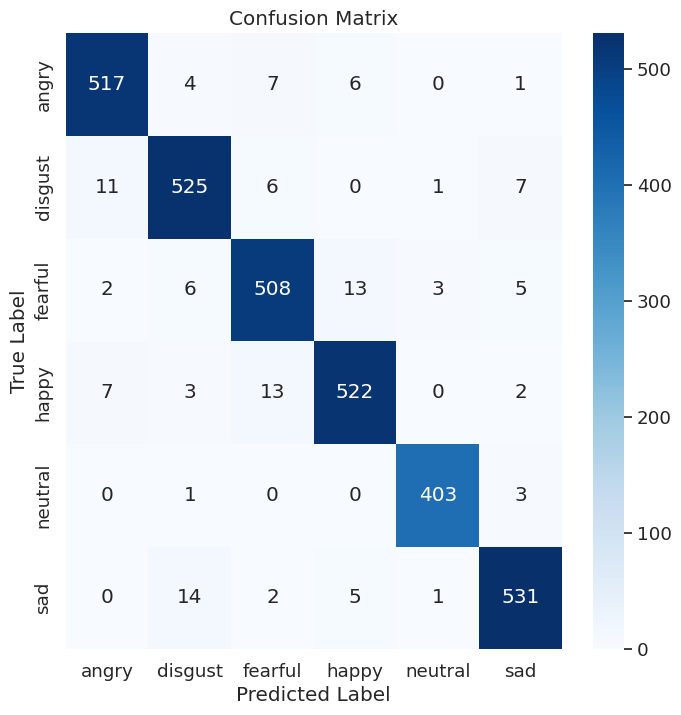

In [22]:
result_cf = confusion_matrix (y_test,y_pred)
sns.set (font_scale=1.2)
plt.figure(figsize=(8,8))
label_name = np.unique(y_test)
sns.heatmap (result_cf,annot=True,cmap='Blues',fmt='g',xticklabels=label_name, yticklabels=label_name)
sns.set (font_scale=1.2)
plt.savefig("second_matrix")
plt.title ('Confusion Matrix')
plt.xlabel ('Predicted Label')
plt.ylabel ('True Label')
plt.show ()
